In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = '../../Data/'

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)

In [15]:

app_train = pd.read_csv(data_path + 'Processed/app_train_processed.csv')

In [5]:
app_train.describe()

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_18,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,PROVIDED_PHONE,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYP

In [6]:
def get_default_rate(data, column):
    
    default_rate_dict = {}
    temp = data.copy()
    temp[column] = temp[column].fillna('Missing')
    for category in temp[column].unique():
        default_count = len(temp[(temp[column] == category) & (temp['TARGET'] == 1)])
        total_count = len(temp[(temp[column] == category)])
        default_rate_dict[(column, category)] = [default_count, total_count, default_count * 100 / total_count]
    df = pd.DataFrame.from_dict(default_rate_dict, orient = 'index', columns = ['Default_Count', 'Total_count', 'Percent_Defaulted'])
    df.index = pd.MultiIndex.from_tuples(df.index, names=['Feature', 'category'])

    return df
            
        

In [16]:
app_train.drop(columns ='Unnamed: 0', inplace = True )

In [9]:
app_train.shape

(307511, 163)

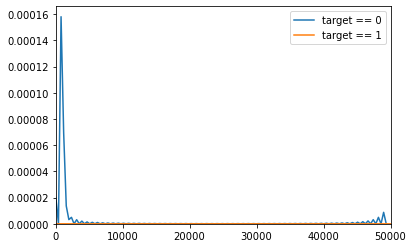

In [10]:
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'AMT_INCOME_TOTAL'] / 365, label = 'target == 0')
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'AMT_INCOME_TOTAL'] / 365, label = 'target == 1')
plt.xlim(0,50000)
plt.show()

In [ ]:
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'AMT_INCOME_TOTAL'] , label = 'target == 1')

In [ ]:
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'AGE'], label = 'target == 0')
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'AGE'], label = 'target == 1')

plt.show()

In [ ]:
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'Years_experience'], label = 'target == 0')
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'Years_experience'], label = 'target == 1')

plt.show()

In [ ]:
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'EXT_SOURCE_3'], label = 'target == 0')
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'EXT_SOURCE_3'], label = 'target == 1')

plt.show()

In [ ]:
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'EXT_SOURCE_2'], label = 'target == 0')
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'EXT_SOURCE_2'], label = 'target == 1')

plt.show()

In [ ]:
[i for i in list(app_train.columns) if 'EXT' in i]

In [ ]:
plt.hist(app_train.loc[app_train['TARGET'] == 0, 'FLAG_OWN_CAR'], label = 'target == 0' )
plt.hist(app_train.loc[app_train['TARGET'] == 1, 'FLAG_OWN_CAR'], label = 'target == 1')

plt.show()

In [ ]:
app_train.dtypes

In [17]:
replace = {
'transport' : [i for i in app_train.columns if 'ORGANIZATION_TYPE_Transport' in i],
'trade' : [i for i in app_train.columns if 'ORGANIZATION_TYPE_Trade' in i],
'industry' : [i for i in app_train.columns if 'ORGANIZATION_TYPE_Industry' in i],
'Businesss' : [i for i in app_train.columns if 'ORGANIZATION_TYPE_Business' in i],
'white_collar' : ['ORGANIZATION_TYPE_Security' , 'ORGANIZATION_TYPE_Military', 'ORGANIZATION_TYPE_Security Ministries','ORGANIZATION_TYPE_Government', 'ORGANIZATION_TYPE_Emergency'],
'services' : ['ORGANIZATION_TYPE_Electricity', 'ORGANIZATION_TYPE_Hotel', 'ORGANIZATION_TYPE_Housing', 'ORGANIZATION_TYPE_Cleaning', 'ORGANIZATION_TYPE_Postal','ORGANIZATION_TYPE_School' ,'ORGANIZATION_TYPE_Kindergarten']
}


In [18]:
for k,v in replace.items():
    app_train[k] = 0
    for val in v:
        app_train[k] += app_train[val] 
    
    app_train.drop(columns = v, inplace = True)

In [20]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_18,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,PROVIDED_PHONE,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,AGE,Years_experience,transport,trade,industry,Businesss,white_collar,services
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-3648.0,-2120,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.083037,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25.920548,1.745205,0,0,0,1,0,0
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-1186.0,-291,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.311267,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45.931507,3.254795,0,0,0,0,0,1
2,100004,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,-4260.0,-2531,1,1,0,1.0,2,2,9,0,0,0,0,0,0,NaN

In [25]:
app_train.drop(columns = ['FLAG_EMP_PHONE','FLAG_CONT_MOBILE','FLAG_EMAIL'], inplace = True)

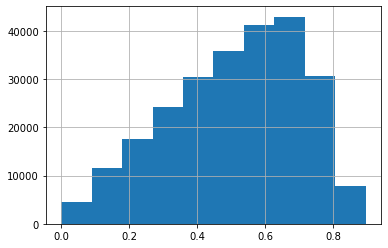

In [28]:
occupation_replace = {
'occ_low_level' : [i for i in app_train.columns if any( t in i for t in ['Low-skill Laborers', 'Drivers', 'Waiters/barmen staff', 'Security staff', 'Laborers', 'Cooking staff', 'Sales staff', 'Cleaning staff'])],
'occ_medium_level' : [i for i in app_train.columns if any( t in i for t in ['Realty agents', 'Secretaries', 'Medicine staff', 'Private service staff', 'IT staff', 'HR staff'])],
'occ_high_leve' :[i for i in app_train.columns if any( t in i for t in ['Core staff', 'Managers', 'High skill tech staff', 'Accountants'])],   
'occ_missing' : [i for i in app_train.columns if 'Missing' in i]
}


In [29]:
occupation_replace

{'occ_low_level': ['OCCUPATION_TYPE_Cleaning staff',
  'OCCUPATION_TYPE_Cooking staff',
  'OCCUPATION_TYPE_Drivers',
  'OCCUPATION_TYPE_Laborers',
  'OCCUPATION_TYPE_Low-skill Laborers',
  'OCCUPATION_TYPE_Sales staff',
  'OCCUPATION_TYPE_Security staff',
  'OCCUPATION_TYPE_Waiters/barmen staff'],
 'occ_medium_level': ['OCCUPATION_TYPE_HR staff',
  'OCCUPATION_TYPE_IT staff',
  'OCCUPATION_TYPE_Medicine staff',
  'OCCUPATION_TYPE_Private service staff',
  'OCCUPATION_TYPE_Realty agents',
  'OCCUPATION_TYPE_Secretaries'],
 'occ_high_leve': ['OCCUPATION_TYPE_Accountants',
  'OCCUPATION_TYPE_Core staff',
  'OCCUPATION_TYPE_High skill tech staff',
  'OCCUPATION_TYPE_Managers'],
 'occ_missing': []}

In [30]:
for k,v in occupation_replace.items():
    app_train[k] = 0
    for val in v:
        app_train[k] += app_train[val] 
    
    app_train.drop(columns = v, inplace = True)

In [31]:
app_train.shape

(307511, 113)

In [43]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_18,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,PROVIDED_PHONE,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,AGE,Years_experience,transport,trade,industry,Businesss,white_collar,services,occ_low_level,occ_medium_level,occ_high_leve,occ_missing,YEARS_LAST_PHONE_CHANGE,accompanied
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-3648.0,-2120,1.0,2,2,10,0,0,0,0,0,0,0.083037,0.262949,0.139376,2.0,2.0,2.0,2.0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25.920548,1.745205,0,0,0,1,0,0,1,0,0,0,3.106849,0
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-1186.0,-291,2.0,1,1,11,0,0,0,0,0,0,0.311267,0.622246,NaN,1.0,0.0,1.0,0.0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45.931507,3.254795,0,0,0,0,0,1,0,0,1,0,2.268493,1
2,100004,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,-4260.0,-2531,1.0,2,2,9,0,0,0,0,0,0,NaN,0.555912,0.729567,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52.180822,0.616438,0,0,0,0,1,0,1,0,0,0,2.232877,0
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,-9833.0,-2437,2.0,2,2,17,0,0,0,0,0,0,NaN,0.650442,NaN,2.0,0.0,2.0,0.0,1,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52.068493,8.326027,0,0,0,1,0,0,1,0,0,0,1.690411,0
4,100007,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,-4311.0,-3458,1.0,2,2,11,0,0,0,0,1,1,NaN,0.322738,NaN,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0

In [34]:
app_train['YEARS_LAST_PHONE_CHANGE'] = -1*app_train['DAYS_LAST_PHONE_CHANGE']/365
app_train.drop(columns = 'DAYS_LAST_PHONE_CHANGE', inplace = True)

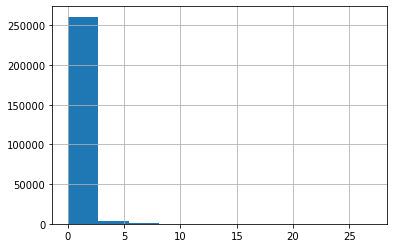

In [35]:
app_train.drop(columns = ['AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'PROVIDED_PHONE', 'CODE_GENDER_XNA'], inplace = True)

In [39]:
accompany_replace = {
'accompanied' : [i for i in app_train.columns if 'NAME_TYPE_SUITE' in i and i  != 'NAME_TYPE_SUITE_Unaccompanied']
}


In [41]:
for k,v in accompany_replace.items():
    app_train[k] = 0
    for val in v:
        app_train[k] += app_train[val] 
    
    app_train.drop(columns = v, inplace = True)

(307511, 108)

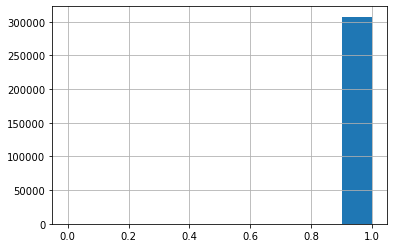

In [36]:
app_train.PROVIDED_PHONE.hist()

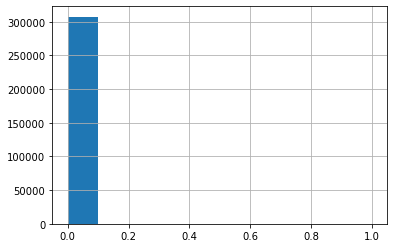

In [37]:
app_train.CODE_GENDER_XNA.hist()

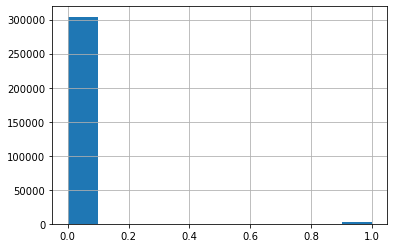

In [38]:
app_train.NAME_TYPE_SUITE_Children.hist()

In [44]:
income_replace = {
'Working ' : [i for i in app_train.columns if any( t in i for t in ['Working', 'Maternity leave	'])],
'Government' : [i for i in app_train.columns if any( t in i for t in ['Commercial associate', 'State servant', 'Pensioner'])]

}

In [45]:
for k,v in income_replace.items():
    app_train[k] = 0
    for val in v:
        app_train[k] += app_train[val] 
    
    app_train.drop(columns = v, inplace = True)

In [47]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_18,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,PROVIDED_PHONE,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,AGE,Years_experience,transport,trade,industry,Businesss,white_collar,services,occ_low_level,occ_medium_level,occ_high_leve,occ_missing,YEARS_LAST_PHONE_CHANGE,accompanied,Working,Government
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-3648.0,-2120,1.0,2,2,10,0,0,0,0,0,0,0.083037,0.262949,0.139376,2.0,2.0,2.0,2.0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25.920548,1.745205,0,0,0,1,0,0,1,0,0,0,3.106849,0,1,0
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-1186.0,-291,2.0,1,1,11,0,0,0,0,0,0,0.311267,0.622246,NaN,1.0,0.0,1.0,0.0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45.931507,3.254795,0,0,0,0,0,1,0,0,1,0,2.268493,1,0,1
2,100004,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,-4260.0,-2531,1.0,2,2,9,0,0,0,0,0,0,NaN,0.555912,0.729567,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52.180822,0.616438,0,0,0,0,1,0,1,0,0,0,2.232877,0,1,0
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,-9833.0,-2437,2.0,2,2,17,0,0,0,0,0,0,NaN,0.650442,NaN,2.0,0.0,2.0,0.0,1,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52.068493,8.326027,0,0,0,1,0,0,1,0,0,0,1.690411,0,1,0
4,100007,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,-4311.0,-3458,1.0,2,2,11,0,0,0,0,1,1,NaN,0.322738,NaN,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,54.608219,8.323288,0,0,0,0,0,0,0,0,1,0,3.030137,0,1,0


In [48]:
marital_status = {
    'Married' : [i for i in app_train.columns if any( t in i for t in ['Single / not married', 'Separated'])]    
}

In [49]:
for k,v in marital_status.items():
    app_train[k] = 0
    for val in v:
        app_train[k] += app_train[val] 
    
    app_train.drop(columns = v, inplace = True)

In [51]:
cols = [i for i in app_train.columns if any( t in i for t in ['Civil marriage', 'Married', 'Widow', 'Unknown'])]
cols.remove('Married')

In [54]:
app_train.drop(columns = cols, inplace = True)


In [58]:
flags = ['FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_18' ]
app_train.drop(columns = flags, inplace = True)

In [60]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,PROVIDED_PHONE,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,AGE,Years_experience,transport,trade,industry,Businesss,white_collar,services,occ_low_level,occ_medium_level,occ_high_leve,occ_missing,YEARS_LAST_PHONE_CHANGE,accompanied,Working,Government,Married
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-3648.0,-2120,1.0,2,2,10,0,0,0,0,0,0,0.083037,0.262949,0.139376,2.0,2.0,2.0,2.0,1,0,0.0,0.0,0.0,0.0,1.0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25.920548,1.745205,0,0,0,1,0,0,1,0,0,0,3.106849,0,1,0,1
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-1186.0,-291,2.0,1,1,11,0,0,0,0,0,0,0.311267,0.622246,NaN,1.0,0.0,1.0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45.931507,3.254795,0,0,0,0,0,1,0,0,1,0,2.268493,1,0,1,0
2,100004,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,-4260.0,-2531,1.0,2,2,9,0,0,0,0,0,0,NaN,0.555912,0.729567,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52.180822,0.616438,0,0,0,0,1,0,1,0,0,0,2.232877,0,1,0,1
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,-9833.0,-2437,2.0,2,2,17,0,0,0,0,0,0,NaN,0.650442,NaN,2.0,0.0,2.0,0.0,1,0,NaN,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52.068493,8.326027,0,0,0,1,0,0,1,0,0,0,1.690411,0,1,0,0
4,100007,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,-4311.0,-3458,1.0,2,2,11,0,0,0,0,1,1,NaN,0.322738,NaN,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,54.608219,8.323288,0,0,0,0,0,0,0,0,1,0,3.030137,0,1,0,1


In [61]:
app_train.drop(columns = 'CODE_GENDER_XNA', inplace = True)

In [63]:
Housing = [i for i in app_train.columns if 'NAME_HOUSING_TYPE' in i]

In [64]:
app_train.drop(columns = Housing, inplace = True)

In [65]:
app_train.shape

(307511, 86)